### Application of Digital Signal Processing in Biomedical Signal Processing: ECG, EEG, EMG Analysis
Mikołaj Zuziak

Each student is assigned a variant of the same ECG processing task. The goal is to:
- Preprocess a simulated or real ECG signal.
- Apply bandpass filtering to remove baseline drift and high-frequency noise.
- Detect R-peaks in the filtered signal.
- Calculate and plot heart rate over time.
- Interpret the results based on signal quality and parameter choices.

The general structure of the task:
1. Load or simulate an ECG signal of a given duration and sampling rate.
2. Apply a bandpass filter with given cutoff frequencies.
3. Detect R-peaks using neurokit2 or a custom algorithm.
4. Compute instantaneous heart rate and visualize it.
5. Comment on how filtering affects R-peak detection.

Variant 9: Duration: 16 s, Sampling Rate: 300 Hz, Filter: 0.5–35 Hz

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

TaskData_Duration = 16 # seconds
TaskData_SamplingRate = 300  # Hz
TaskData_FilterLow = 0.5  # Hz
TaskData_FilterHigh = 35  # Hz

# Simulate ECG
ecg = nk.ecg_simulate(duration=TaskData_Duration, sampling_rate=TaskData_SamplingRate)
fs = TaskData_SamplingRate  # Sampling rate

In [25]:
# Bandpass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, TaskData_FilterLow, TaskData_FilterHigh, fs)

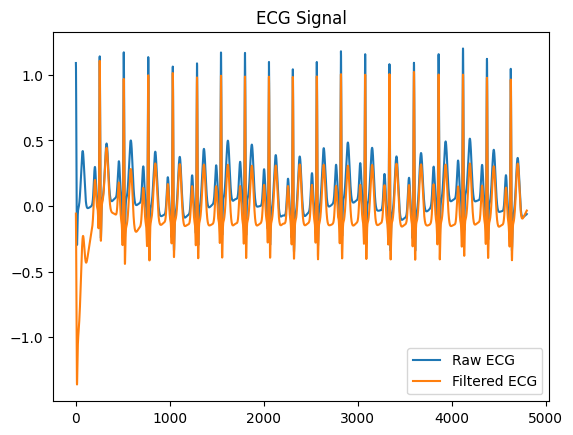

In [26]:
# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

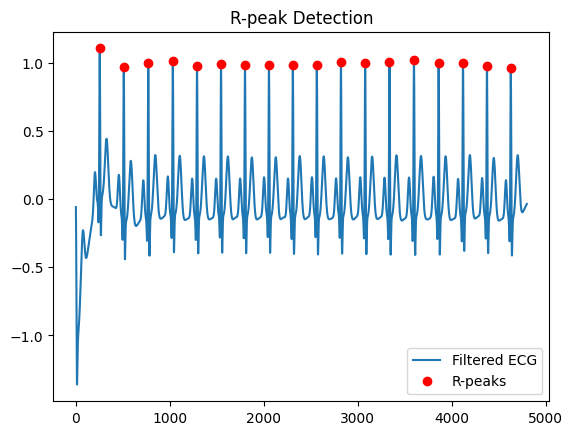

In [35]:
# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

Average Heart Rate: 69.97 bpm


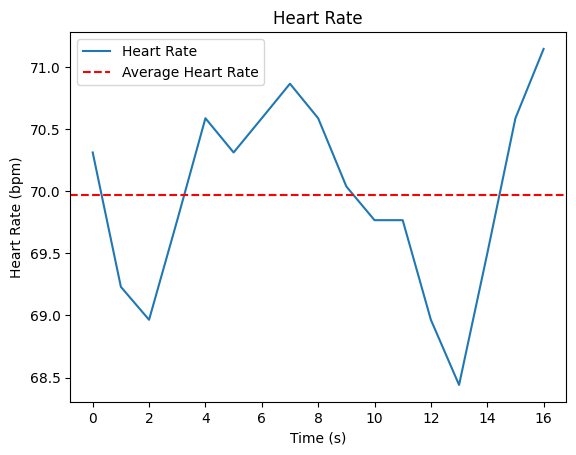

In [36]:
# Heart rate calculation
rr_intervals = np.diff(r_peaks) / fs # Calculate RR intervals between R-peaks and convert to seconds by dividing by fs
heart_rate = 60 / rr_intervals # Convert to bpm

# Output average heart rate
average_heart_rate = np.mean(heart_rate)
print(f"Average Heart Rate: {average_heart_rate:.2f} bpm")

# Visualize heart rate
plt.plot(heart_rate, label="Heart Rate")
plt.title("Heart Rate")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (bpm)")
plt.axhline(y=average_heart_rate, color='r', linestyle='--', label='Average Heart Rate')
plt.legend()
plt.show()


Filtering removes baseline drift through the low-frequency cutoff, making the baseline more stable for accurate R-peak detection. The high-frequency cutoff eliminates noise like muscle artifacts and electrical interference, creating a cleaner signal where R-peaks stand out more clearly. Overall, the bandpass filtering improves the signal-to-noise ratio, allowing for more reliable and accurate detection of R-peaks in the ECG signal.